In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Perform Chinese Restaurant Process
def CRP(alpha, N):
    # First seating
    clusters = [[1]]
    for i in range(2, N + 1):
        # Calculate cluster assignment as index to the list clusters.
        p = np.random.uniform(0, 1)
        probs = np.array([len(cluster) / (i + alpha-1) for cluster in clusters])
        cluster_assignment = sum(np.cumsum(probs) < p)
        
        # Make new table or assign to current
        if cluster_assignment == len(clusters):
            clusters.append([i])
        else:
            clusters[cluster_assignment].append(i)
    
    # Return the cluster sizes
    return np.array([len(cluster) for cluster in clusters])

# Return a symmetric matrix of cluster probabilities,
# defined by a beta distribution.
def Phi(clusters, a, b):
    n = len(clusters)
    phis = np.random.beta(a,b,(n,n))
    # Symmetrize
    for i in range(n-1,-1,-1):
        for j in range(n):
            phis[i,j]=phis[j,i]
    
    return phis

# Helper function to construct block matrix of cluster probabilities.
def make_block_phis(phis, clusters):
    for i, ii in enumerate(clusters):
        for j, jj in enumerate(clusters):
            if j==0:
                A=np.full((ii,jj),phis[i,j])
            else:
                A=np.hstack((A,np.full((ii,jj),phis[i,j])))

        if i==0:
            block_phis=A
        else:
            block_phis=np.vstack((block_phis,A))
    
    return block_phis

# Construct adjacency matrix.
def Adj_matrix(phis, clusters):
    n=sum(clusters)
    Adj_matrix=np.zeros((n,n))
    
    block_phis=make_block_phis(phis,clusters)
    
    # Iterate over all nodes and cluster probabilities.
    for i in range(n):
        for j in range(n):
            p=np.random.rand()
            if p<block_phis[i,j]:
                Adj_matrix[i,j]=1
                Adj_matrix[j,i]=1
            else:
                Adj_matrix[i,j]=0
                Adj_matrix[j,i]=0
    
    return Adj_matrix



[15  2  2  1]
[[0.27148754 0.01777589 0.92374999 0.81494532]
 [0.01777589 0.26715309 0.89253243 0.80179192]
 [0.92374999 0.89253243 0.56603239 0.45478055]
 [0.81494532 0.80179192 0.45478055 0.00571154]]


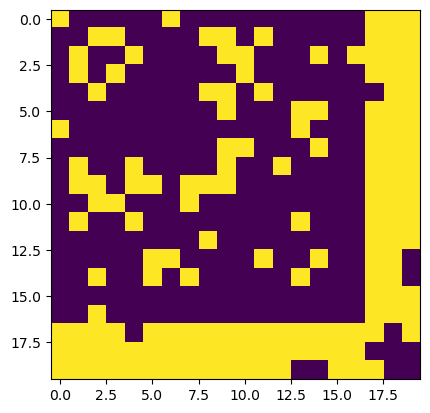

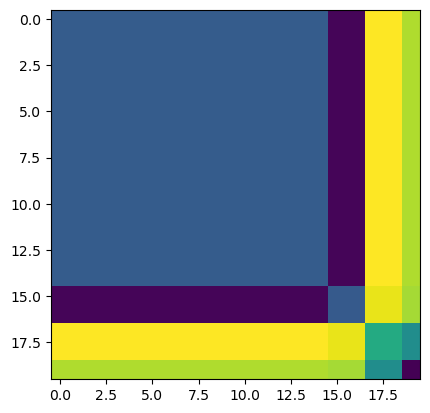

In [6]:
clusters=CRP(1,20)
phis=Phi(clusters,1/2,1/2)
Adj=Adj_matrix(phis,clusters)
print(clusters)
print(phis)
plt.imshow(Adj)
plt.figure()
plt.imshow(make_block_phis(phis,clusters))